In [20]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cosmic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
train_file = "../data/smsspamcollection/SMSSpamCollection"

df_train = pd.read_csv(train_file, sep="\t", header=None, names=["label", "text"])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 2748


In [22]:
df_train.head(10)

,label,text
0,negative,So there is no way for me to plug it in here i...
1,positive,"Good case, Excellent value."
2,positive,Great for the jawbone.
3,negative,Tied to charger for conversations lasting more...
4,positive,The mic is great.
5,negative,I have to jiggle the plug to get it to line up...
6,negative,If you have several dozen or several hundred c...
7,positive,If you are Razr owner...you must have this!
8,negative,"Needless to say, I wasted my money."
9,negative,What a waste of money and time!.


In [23]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [24]:
df_train.head(10)

,label,text
0,negative,so there is no way for me to plug it in here i...
1,positive,"good case, excellent value."
2,positive,great for the jawbone.
3,negative,tied to charger for conversations lasting more...
4,positive,the mic is great.
5,negative,i have to jiggle the plug to get it to line up...
6,negative,if you have several dozen or several hundred c...
7,positive,if you are razr owner...you must have this!
8,negative,"needless to say, i wasted my money."
9,negative,what a waste of money and time!.


In [25]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
label    0
text     0
dtype: int64


In [26]:
print("Original data:")
df_train.head(5)

Original data:


,label,text
0,negative,so there is no way for me to plug it in here i...
1,positive,"good case, excellent value."
2,positive,great for the jawbone.
3,negative,tied to charger for conversations lasting more...
4,positive,the mic is great.


In [27]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


,label,text
0,negative,so there is no way for me to plug it in here i...
1,positive,"good case, excellent value."
2,positive,great for the jawbone.
3,negative,tied to charger for conversations lasting more...
4,positive,the mic is great.


In [28]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
positive    0.505459
negative    0.494541
Name: label, dtype: float64


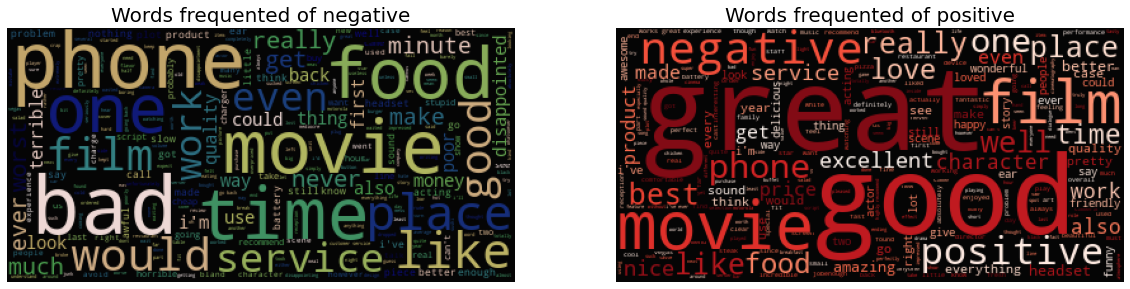

In [29]:
%matplotlib inline

dataset = df_train
eng_stopwords = set(stopwords.words("english"))

plt.figure(figsize=(20,20))
plt.subplot(121)
sub_text=dataset[dataset.label=="negative"].text.values
subwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
subwc.generate(" ".join(sub_text))
plt.axis("off")
plt.title("Words frequented of negative", fontsize=20)
plt.imshow(subwc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

plt.subplot(122)
non_text=dataset[dataset.label=="positive"].text.values
nonwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
nonwc.generate(" ".join(non_text))
plt.axis("off")
plt.title("Words frequented of positive", fontsize=20)
plt.imshow(nonwc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [30]:
from collections import Counter
c_sub = Counter()
for sent in sub_text:
    c_sub.update(sent.split())
    
c_non = Counter()
for sent in non_text:
    c_non.update(sent.split())


In [31]:
inter_words = set(c_non).intersection(set(c_sub))
inter_words.difference_update(eng_stopwords)
print("Common words use in both: %d"%(len(inter_words)))
inter_words

Common words use in both: 1397


{'plan',
 'boost',
 'real',
 'part',
 'send',
 'product',
 'scene.',
 'dropped',
 'this.',
 "(it's",
 'club',
 'guess',
 'focus',
 'recently',
 'extremely',
 'hold',
 'sucks,',
 'absolutely',
 'cooked',
 '(one',
 'choice.',
 'however,',
 'lead',
 'shed',
 'great,',
 'access',
 'allowing',
 'reasonable',
 'predictable.',
 'instead',
 'white',
 'reception.',
 'flavor.',
 'filling',
 'overall,',
 'review',
 'step',
 'mention',
 'done',
 'motorola',
 'create',
 'feet',
 'least',
 'terrible.',
 'wireless',
 'simple',
 'would.',
 'utterly',
 'mainly',
 'around',
 'killer',
 'calls,',
 'songs',
 'circumstances',
 'reception',
 'hit',
 'dozen',
 'table.',
 'included',
 'place',
 'opening',
 'effects',
 'set',
 'feels',
 'pasta',
 'directed',
 'hear',
 'seat',
 'replace',
 'design',
 'point',
 'level',
 'junk.',
 'telephone',
 'lost',
 'series',
 'bit',
 'particular',
 'told',
 'place,',
 'before.',
 'john',
 'previous',
 'seem',
 'purchased',
 'half',
 "we'd",
 'eating',
 'rating:',
 '1',
 'mo

In [32]:
sus_wd = []
for wd in inter_words:
    if c_sub[wd] >= c_non[wd]*3:
        sus_wd.append(wd)
sus_wd

['dropped',
 'guess',
 'hear',
 'junk.',
 'lost',
 'half',
 'eating',
 'none',
 'else',
 'signal',
 'soon.',
 'impressed.',
 'fried',
 'fear',
 'money.',
 'table',
 'face',
 'us.',
 'weak',
 'fan',
 'longer',
 'bad',
 'checked',
 'charge',
 'broke',
 'avoid',
 'passed',
 'charging',
 'purchase',
 'return',
 'space',
 'nothing',
 'best.',
 'customer',
 'ended',
 'wait',
 'star',
 'sending',
 'style',
 'idea',
 'fairly',
 'cold',
 'back.',
 'much.',
 'cannot',
 'disappointed',
 'sometimes',
 'problem.',
 'computer',
 'pathetic',
 'for.',
 'fails',
 'unfortunately,',
 'buy',
 'either.',
 'work.',
 'insult',
 'calls',
 'seemed',
 'ear.',
 'walked',
 'literally',
 'also,',
 'fish',
 'awful.',
 '--',
 'worse',
 'area',
 'money',
 'waste',
 'says',
 'bother',
 'stupid',
 'poor',
 'lasts',
 'pair',
 'minutes',
 'business',
 'later',
 'barely',
 'turned',
 'times',
 'final',
 'worst',
 'old,',
 'terrible',
 'color',
 'needed',
 'mediocre',
 'feature',
 'picture',
 'connection',
 'plug',
 'waste

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["text","label"]].sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [34]:
train.to_csv("../data/smsspamcollection/train.csv", index=False)
dev.to_csv("../data/smsspamcollection/test.csv", index=False)

In [35]:
dev.head(10)

,text,label
0,price is good too.,positive
1,her lines seem to have been written by a fifte...,negative
2,cumbersome design.,negative
3,always a great time at dos gringos!,positive
4,it is not good.,negative
5,this particular model would not work with my m...,negative
6,"i'd rather eat airline food, seriously.",negative
7,bad purchase.,negative
8,what a mistake.,negative
9,"it's a sad movie, but very good.",positive


In [36]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["label"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 1923


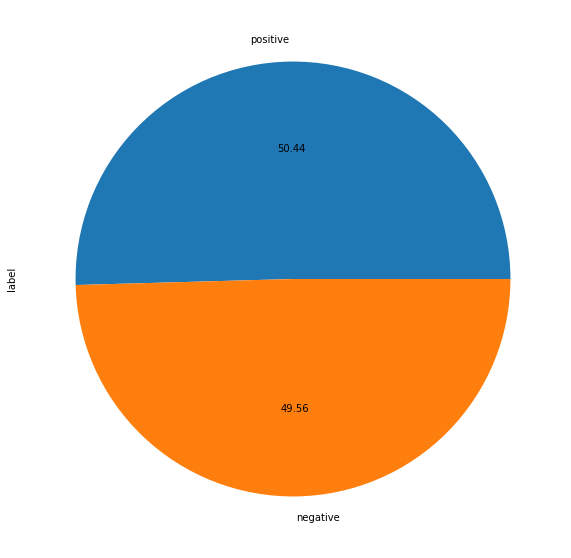

In [37]:
pieplt(train)

Print len of data: 825


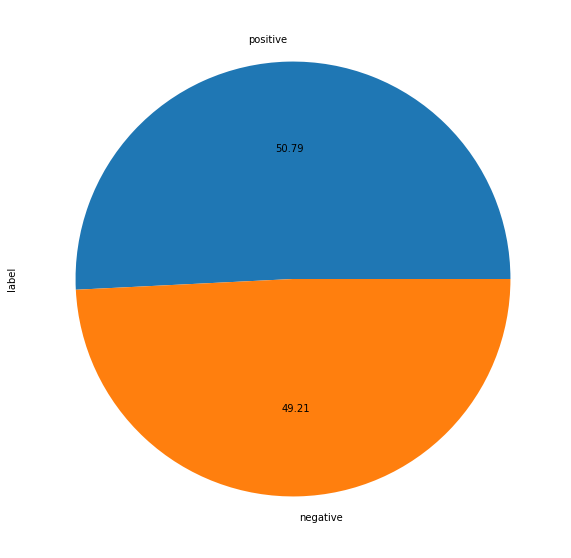

In [38]:
pieplt(dev)